# SASA analysis

## Import libraries

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import seaborn as sns
from score import get_sasa, get_plddt

plt.style.use("tableau-colorblind10")
loc = plticker.MultipleLocator(base=0.1)

/tmp/ipykernel_62530/226688501.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Preprocess dataframes once

In [2]:
#from score import make_sasa_df
#make_sasa_df()

## Plotting constants

In [3]:
# Some identifier names might need to change
bins = [0.0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1]
identifiers = [
    "AF_FULL",
    "ATTNPACK",
    "ATTNPACK_AF",
    "BB_CB",
    "CB_HEURISTIC",
    "FASPR_AF",
    "PSF_AF",
    "TEMPLATE_AF",
]
method_names = {
    "BB_CB": "Template Beta",
    "AF_FULL": "MSA",
    "ATTNPACK": "AttnPacker",
    "ATTNPACK_AF": "AttnPacker (AF)",
    "BB": "Backbone",
    "BB_PSF": "C36",
    "CB_DUMMY": "Dummy",
    "CB_HEURISTIC": "Heuristic",
    "FASPR": "FASPR",
    "FASPR_AF": "FASPR (AF)",
    "PSF_AF": "C36 (AF)",
    "TEMPLATE_AF": "Template (AF)",
}
columns = ["TM-score", "lDDT", "RMSD", "MAE 1", "MAE 2", "MAE 3", "MAE 4"]
measure_dict = {
    "lddt": "lDDT",
    "tm_score": "TM-score",
    "af_pLDDT_mean": "pLDDT",
    "att_rmsd_mean": "RMSD",
    "att_mae1_mean": "MAE 1",
    "att_mae2_mean": "MAE 2",
    "att_mae3_mean": "MAE 3",
    "att_mae4_mean": "MAE 4",
    "method": "Method",
    "dataset": "Dataset",
}
method_dict = {
    "BB_CB": "Template Beta",
    "AF_FULL": "MSA",
    "ATTNPACK": "AttnPacker",
    "ATTNPACK_AF": "AttnPacker (AF)",
    "BB": "Backbone",
    "BB_PSF": "C36",
    "CB_DUMMY": "Dummy",
    "CB_HEURISTIC": "Heuristic",
    "FASPR": "FASPR",
    "FASPR_AF": "FASPR (AF)",
    "PSF_AF": "C36 (AF)",
    "TEMPLATE_AF": "Template (AF)",
}
linestyles = [
    ("loosely dotted", (0, (1, 10))),
    ("dotted", (0, (1, 1))),
    ("densely dotted", (0, (1, 1))),
    ("long dash with offset", (5, (10, 3))),
    ("loosely dashed", (0, (5, 10))),
    ("dashed", (0, (5, 5))),
    ("densely dashed", (0, (5, 1))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("dashdotted", (0, (3, 5, 1, 5))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]

## Plotting

<Figure size 640x480 with 0 Axes>

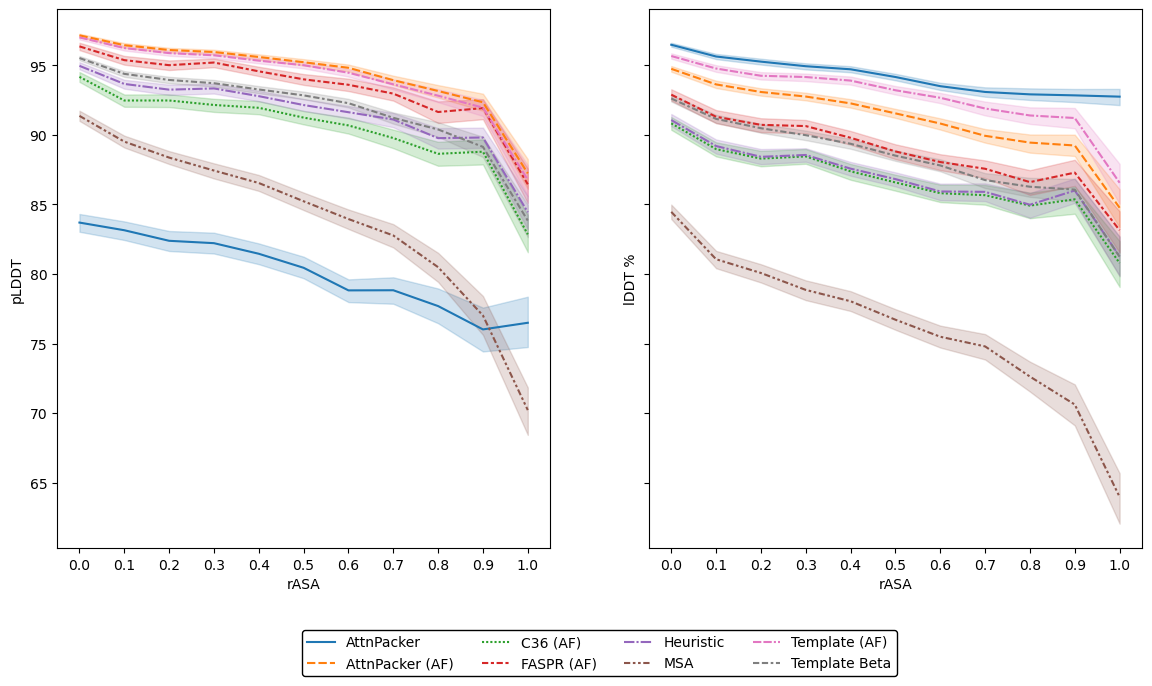

<Figure size 640x480 with 0 Axes>

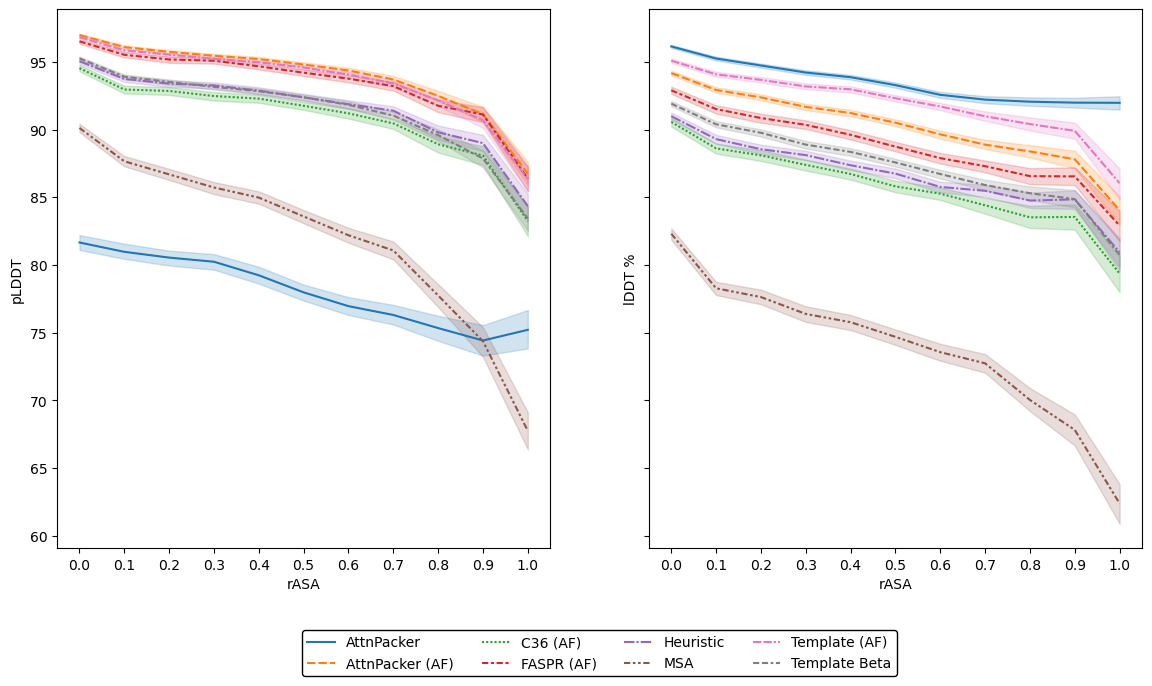

<Figure size 640x480 with 0 Axes>

In [4]:
pearson_corrs = []
for dataset in ["CASP13", "CASP14"]:
    df = pd.read_csv(
        f"/data/jgut/template-analysis/correlations/corr_{dataset}_ATTNPACK.csv"
    )
    hist = df[df["sasa_resname"] != "GLY"]["sasa_sasa"].hist(
        bins=bins
    )  # glycine has no side-chain to place
    hist.set_xlabel("rASA")
    hist.set_ylabel("Amount")
    hist.grid(False)
    hist.xaxis.set_major_locator(loc)
    plt.savefig(
        f"visualisations/{dataset}_histogram.svg", bbox_inches="tight", transparent=True
    )
    plt.clf()
    fig, (plddt, lddt) = plt.subplots(1, 2, sharey="row", figsize=(14, 7))
    dfs = []
    for num, method in enumerate(sorted(identifiers, key=lambda x: method_names[x])):
        df = pd.read_csv(
            f"/data/jgut/template-analysis/correlations/corr_{dataset}_{method}.csv"
        )
        df["sasa_bin"] = pd.cut(
            df["sasa_sasa"], bins, labels=[elem / 10 for elem in range(11)]
        )
        df["Method"] = method_names[method]
        df["local_lddt"] = df["local_lddt"] * 100
        corrs = df[df["sasa_resname"] != "GLY"][
            ["sasa_sasa", "local_lddt", "af_pLDDT"]
        ].corr()
        lddt_x_sasa = corrs.iloc[0, 1]
        plddt_x_sasa = corrs.iloc[0, 2]
        lddt_x_plddt = corrs.iloc[1, 2]
        pearson_corrs.append(
            {
                "Dataset": dataset,
                "Method": method,
                "lddt_x_sasa": lddt_x_sasa,
                "plddt_x_sasa": plddt_x_sasa,
                "lddt_x_plddt": lddt_x_plddt,
            }
        )
        dfs.append(df)
    # grp = df[df["sasa_resname"]!="GLY"].groupby("sasa_bin")[["local_lddt", "af_pLDDT", "sasa_sasa"]]#.agg("mean")
    # std = df[df["sasa_resname"]!="GLY"].groupby("sasa_bin")[["local_lddt", "af_pLDDT", "sasa_sasa"]]#.agg("std")
    # sns.lineplot([i/10 for i in range(11)],grp["af_pLDDT"], label=method_names[method], linewidth=3,)# yerr=std["af_pLDDT"], capsize=4, elinewidth=1, alpha=0.5, linestyle=linestyles[::-1][num][1])
    # lddt.plot([i/10 for i in range(11)],grp["local_lddt"]*100, label=method_names[method],linewidth=3,)# yerr=std["local_lddt"]*100, capsize=5, elinewidth=1, alpha=0.5, linestyle=linestyles[::-1][num][1])
    comb = pd.concat(dfs).reset_index()
    # mean and 95% confidence interval https://seaborn.pydata.org/generated/seaborn.lineplot.html
    sns.lineplot(
        data=comb,
        x="sasa_bin",
        y="af_pLDDT",
        hue="Method",
        style="Method",
        ax=plddt,
        palette="tab10",
    )
    lddt.set_ylabel("lDDT %")
    sns.lineplot(
        data=comb,
        x="sasa_bin",
        y="local_lddt",
        hue="Method",
        style="Method",
        ax=lddt,
        palette="tab10",
    )
    legend = plt.legend(
        edgecolor="black", loc="lower center", bbox_to_anchor=(-0.1, -0.25), ncol=4
    )
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0, 0.0))
    plddt.set_xlabel("rASA")
    plddt.set_ylabel("pLDDT")
    lddt.set_xlabel("rASA")
    plddt.get_legend().remove()
    lddt.xaxis.set_major_locator(loc)
    plddt.xaxis.set_major_locator(loc)
    plt.savefig(
        f"visualisations/{dataset}_sasa.svg", bbox_inches="tight", transparent=True
    )
    plt.show()
    plt.clf()

## SASA table

In [5]:
corrs = pd.DataFrame(pearson_corrs).rename(measure_dict, axis=1)
corrs["Method"] = corrs["Method"].replace(method_dict)
corrs.sort_values(["Method", "Dataset"]).groupby(["Method", "Dataset"]).agg(
    "mean"
).to_latex(float_format="%.3f", escape=False, bold_rows=True)

'\\begin{tabular}{llrrr}\n\\toprule\n &  & lddt_x_sasa & plddt_x_sasa & lddt_x_plddt \\\\\nMethod & Dataset &  &  &  \\\\\n\\midrule\n\\multirow[t]{2}{*}{\\textbf{AttnPacker}} & \\textbf{CASP13} & -0.265 & -0.155 & 0.341 \\\\\n\\textbf{} & \\textbf{CASP14} & -0.291 & -0.154 & 0.388 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{AttnPacker (AF)}} & \\textbf{CASP13} & -0.285 & -0.311 & 0.644 \\\\\n\\textbf{} & \\textbf{CASP14} & -0.298 & -0.301 & 0.637 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{C36 (AF)}} & \\textbf{CASP13} & -0.182 & -0.179 & 0.681 \\\\\n\\textbf{} & \\textbf{CASP14} & -0.204 & -0.203 & 0.633 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{FASPR (AF)}} & \\textbf{CASP13} & -0.209 & -0.199 & 0.811 \\\\\n\\textbf{} & \\textbf{CASP14} & -0.242 & -0.225 & 0.758 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{Heuristic}} & \\textbf{CASP13} & -0.198 & -0.211 & 0.779 \\\\\n\\textbf{} & \\textbf{CASP14} & -0.230 & -0.230 & 0.728 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}